In [1]:
import numpy as np
import datamanager as DM
import matplotlib.pyplot as plt
import model as Model
from tsaug import TimeWarp, Crop, Quantize, Drift, Reverse

In [2]:
Country_Data = DM.Data_Manager('/Users/u0979082/Documents/COVID19Research/Evan_Dataset_Code_scrubbed/COVID19_country_04-02-2020.csv')

In [3]:
#Lets Look at the available countries
print(Country_Data.Get_Available_Countries())

['Austria' 'Belgium' 'France' 'Germany' 'Greece' 'Israel' 'Italy'
 'Netherlands' 'Norway' 'Spain' 'Sweden' 'Switzerland' 'United Kingdom'
 'United States of America']


In [4]:
Country_Data.Set_Country('Italy')
#Now Look at available State
print(Country_Data.Get_Province_State())

['NA']


In [5]:
#Since there are no states or regions for this country I set 'NA'
Country_Data.Set_Province_State('NA')

In [6]:
Country_Data.Set_Min_Confirmed(1)

In [7]:
Total_Conf_Death_Time, Total_Conf_New_Death_Count = Country_Data.Get_Total_Confirm()
Total_Death_Time, Total_Death_Count = Country_Data.Get_Total_Death()
#Ignore the warning message for now.
#The woarning is harmless for now.

/usr/local/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


/usr/local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


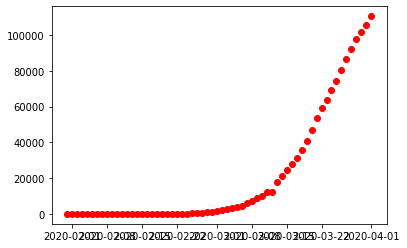

In [8]:
plt.plot(Total_Conf_Death_Time,Total_Conf_New_Death_Count,'ro')

In [9]:
Dt = (Total_Conf_Death_Time - Total_Conf_Death_Time[0])/(60.0*60.0*24.0)/1000000000
Dt = Dt + 1 #Start with 1 because tsaug require to start with 1

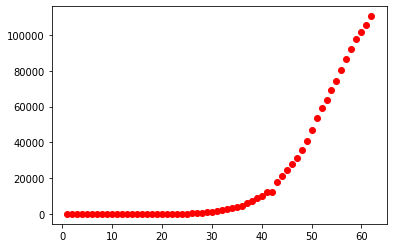

In [10]:
plt.plot(Dt,Total_Conf_New_Death_Count,'ro')

In [11]:
#Now you can apply data augmentation from tsaug
#For an example here I apply Reserve
my_augmenter = (
    TimeWarp() 
    #+ Crop(size=10)
    + Quantize(n_levels=[10, 20, 30])
    + Drift(max_drift=(0.1, 0.5)) @ 0.8
    + Reverse() @ 0.5
)

In [12]:
X_aug, Y_aug = my_augmenter.augment(Dt , Total_Conf_New_Death_Count )

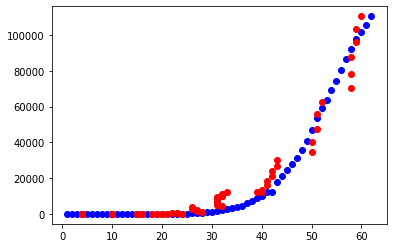

In [13]:
plt.plot(Dt,Total_Conf_New_Death_Count,'bo')
plt.plot(X_aug, Y_aug,'ro')

In [14]:
Test_model = Model.Model(Dt, Total_Conf_New_Death_Count, 0, 0, 0,0)
y_modeled, y_err_down, y_err_up = Test_model.Fake_SIR_Model()

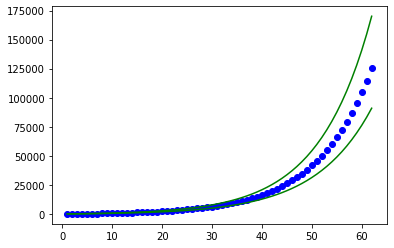

In [15]:
plt.plot(Dt,y_modeled,'bo')
plt.plot(Dt,y_err_down,'g-')
plt.plot(Dt,y_err_up,'g-')

In [16]:
#Now train the same model with Augmentations
Aug_model = Model.Model(X_aug, Y_aug, 0, 0, 0,0)
y_Aug_modeled, y_Aug_err_down, y_Aug_err_up = Test_model.Fake_SIR_Model()

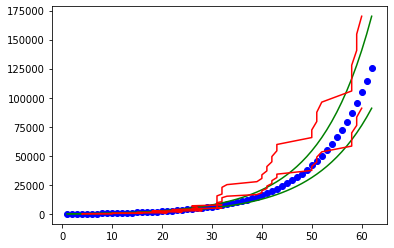

In [20]:
#Now you could visualize how the augmentation changes the model prediction
plt.plot(Dt,y_modeled,'bo')
plt.plot(Dt,y_err_down,'g-')
plt.plot(Dt,y_err_up,'g-')

plt.plot(X_aug,y_Aug_err_down,'r-')
plt.plot(X_aug,y_Aug_err_up,'r-')
